<h1>The Search for New Earths</h1>

The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of `2` or `1`. `2` indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.<br>
The data presented here are cleaned and are derived from observations made by the NASA Kepler space telescope. 

<h2> Decription</h2>

Trainset:<br>
<li>5087 rows or observations.
<li>3198 columns or features.
<li>Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
<li>37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.
<br>
    
Testset:<br>
<li>570 rows or observations.
<li>3198 columns or features.
<li>Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
<li>5 confirmed exoplanet-stars and 565 non-exoplanet-stars.
<br>    
    
Label:<br>
``1`` : Non-Exoplanet Star<br>
``2`` : Exoplanet Star<br>
<hr>

# Load the Data

In [1]:
import pandas as pd

training_data =  pd.read_csv('exoTrain.csv')
testing_data  =  pd.read_csv('exoTest.csv' )

In [3]:
Let's see what the data looks like: 

SyntaxError: EOL while scanning string literal (<ipython-input-3-bd02ee5a2eaa>, line 1)

In [2]:
print("Size of Training: ", training_data.shape)
print("Size of Testing:  ", testing_data.shape)

Size of Training:  (5087, 3198)
Size of Testing:   (570, 3198)


In [3]:
training_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
testing_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [5]:
X_train = training_data.loc[:,"FLUX.1":"FLUX.3197"]
y_train = training_data.loc[:,"LABEL"]

Since we have 3,198 features we will be using PCA to reduce the dimensionality but first we will standardize our training data
<hr>

# Preprocessing data
## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardize = scaler.fit_transform(X_train)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [7]:
import numpy as np

np.round(np.mean(X_train_standardize)),np.std(X_train_standardize)

(-0.0, 1.0)

## PCA
choosing the <b>_d_</b> dimension is to choose the number of dimensions that add up to a sufficiently large portion of the variance. In our case we will be choosing 97%.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.97)
X_training_reduced = pca.fit_transform(X_train_standardize)
print("Reduced to ", pca.n_components_, " features")

Reduced to  13  features


In [9]:
X_training_reduced_df = pd.DataFrame(data=X_training_reduced, 
                                     columns = ['principal component '+str(i) for i in range(1,pca.n_components_+1)])
X_training_reduced_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13
0,-0.877626,-0.207684,-0.377819,-0.039444,-0.049104,-0.303499,-0.144108,-0.012560,-0.115952,-0.110266,-0.048105,0.020416,-0.036627
1,-0.891087,-0.157275,-0.414121,-0.105086,-0.086087,-0.230774,-0.100156,0.077395,-0.088215,-0.130910,-0.037975,-0.074378,-0.057358
2,-0.982439,0.078053,-0.561659,-0.372453,-0.135209,-0.204867,-0.078795,0.214136,-0.003310,-0.124718,-0.032027,-0.022786,-0.073112
3,-0.919516,-0.135503,-0.441615,-0.183559,-0.109155,-0.219593,-0.098396,0.076506,-0.059351,-0.133337,-0.031117,-0.115664,-0.079823
4,-1.385796,-0.309362,-0.064631,0.475238,-0.033298,-0.453479,-0.274385,0.222627,-0.101000,-0.094631,0.099866,0.095727,-0.041619


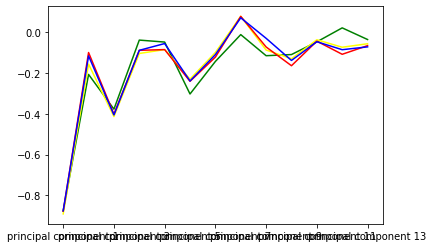

In [31]:
X_training_reduced_df.iloc[0].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'green')
X_training_reduced_df.iloc[1].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'yellow')
X_training_reduced_df.iloc[40].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'red')
X_training_reduced_df.iloc[100].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'blue')

### 3D Visualizing

In [10]:
pca_two = PCA(n_components=3)
plotData = pca_two.fit_transform(X_train_standardize)
print("Data captured ", np.round(np.sum(pca_two.explained_variance_ratio_),5) * 100, "%")
print(np.round((1-np.sum(pca_two.explained_variance_ratio_)),5) * 100, "% information is lost.")

Data captured  64.839 %
35.161 % information is lost.


In [11]:
plotData_df = pd.DataFrame(data=plotData, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
label_df = y_train.to_frame()
plotData_df['Label'] = label_df

Graph isnt going to be good

In [12]:
import plotly.express as px
fig = px.scatter_3d(plotData_df, x='principal component 1', y='principal component 2', z='principal component 3',
              color='Label')
fig.show()

<hr>

# Main Algorigthm

In [66]:
X_training_reduced_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13
0,-0.877626,-0.207684,-0.377819,-0.039444,-0.049104,-0.303499,-0.144108,-0.012560,-0.115952,-0.110266,-0.048105,0.020416,-0.036627
1,-0.891087,-0.157275,-0.414121,-0.105086,-0.086087,-0.230774,-0.100156,0.077395,-0.088215,-0.130910,-0.037975,-0.074378,-0.057358
2,-0.982439,0.078053,-0.561659,-0.372453,-0.135209,-0.204867,-0.078795,0.214136,-0.003310,-0.124718,-0.032027,-0.022786,-0.073112
3,-0.919516,-0.135503,-0.441615,-0.183559,-0.109155,-0.219593,-0.098396,0.076506,-0.059351,-0.133337,-0.031117,-0.115664,-0.079823
4,-1.385796,-0.309362,-0.064631,0.475238,-0.033298,-0.453479,-0.274385,0.222627,-0.101000,-0.094631,0.099866,0.095727,-0.041619
